In [1]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from pca_model import pca_transform
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/framingham.csv')

df = df.fillna(df.mean())

print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

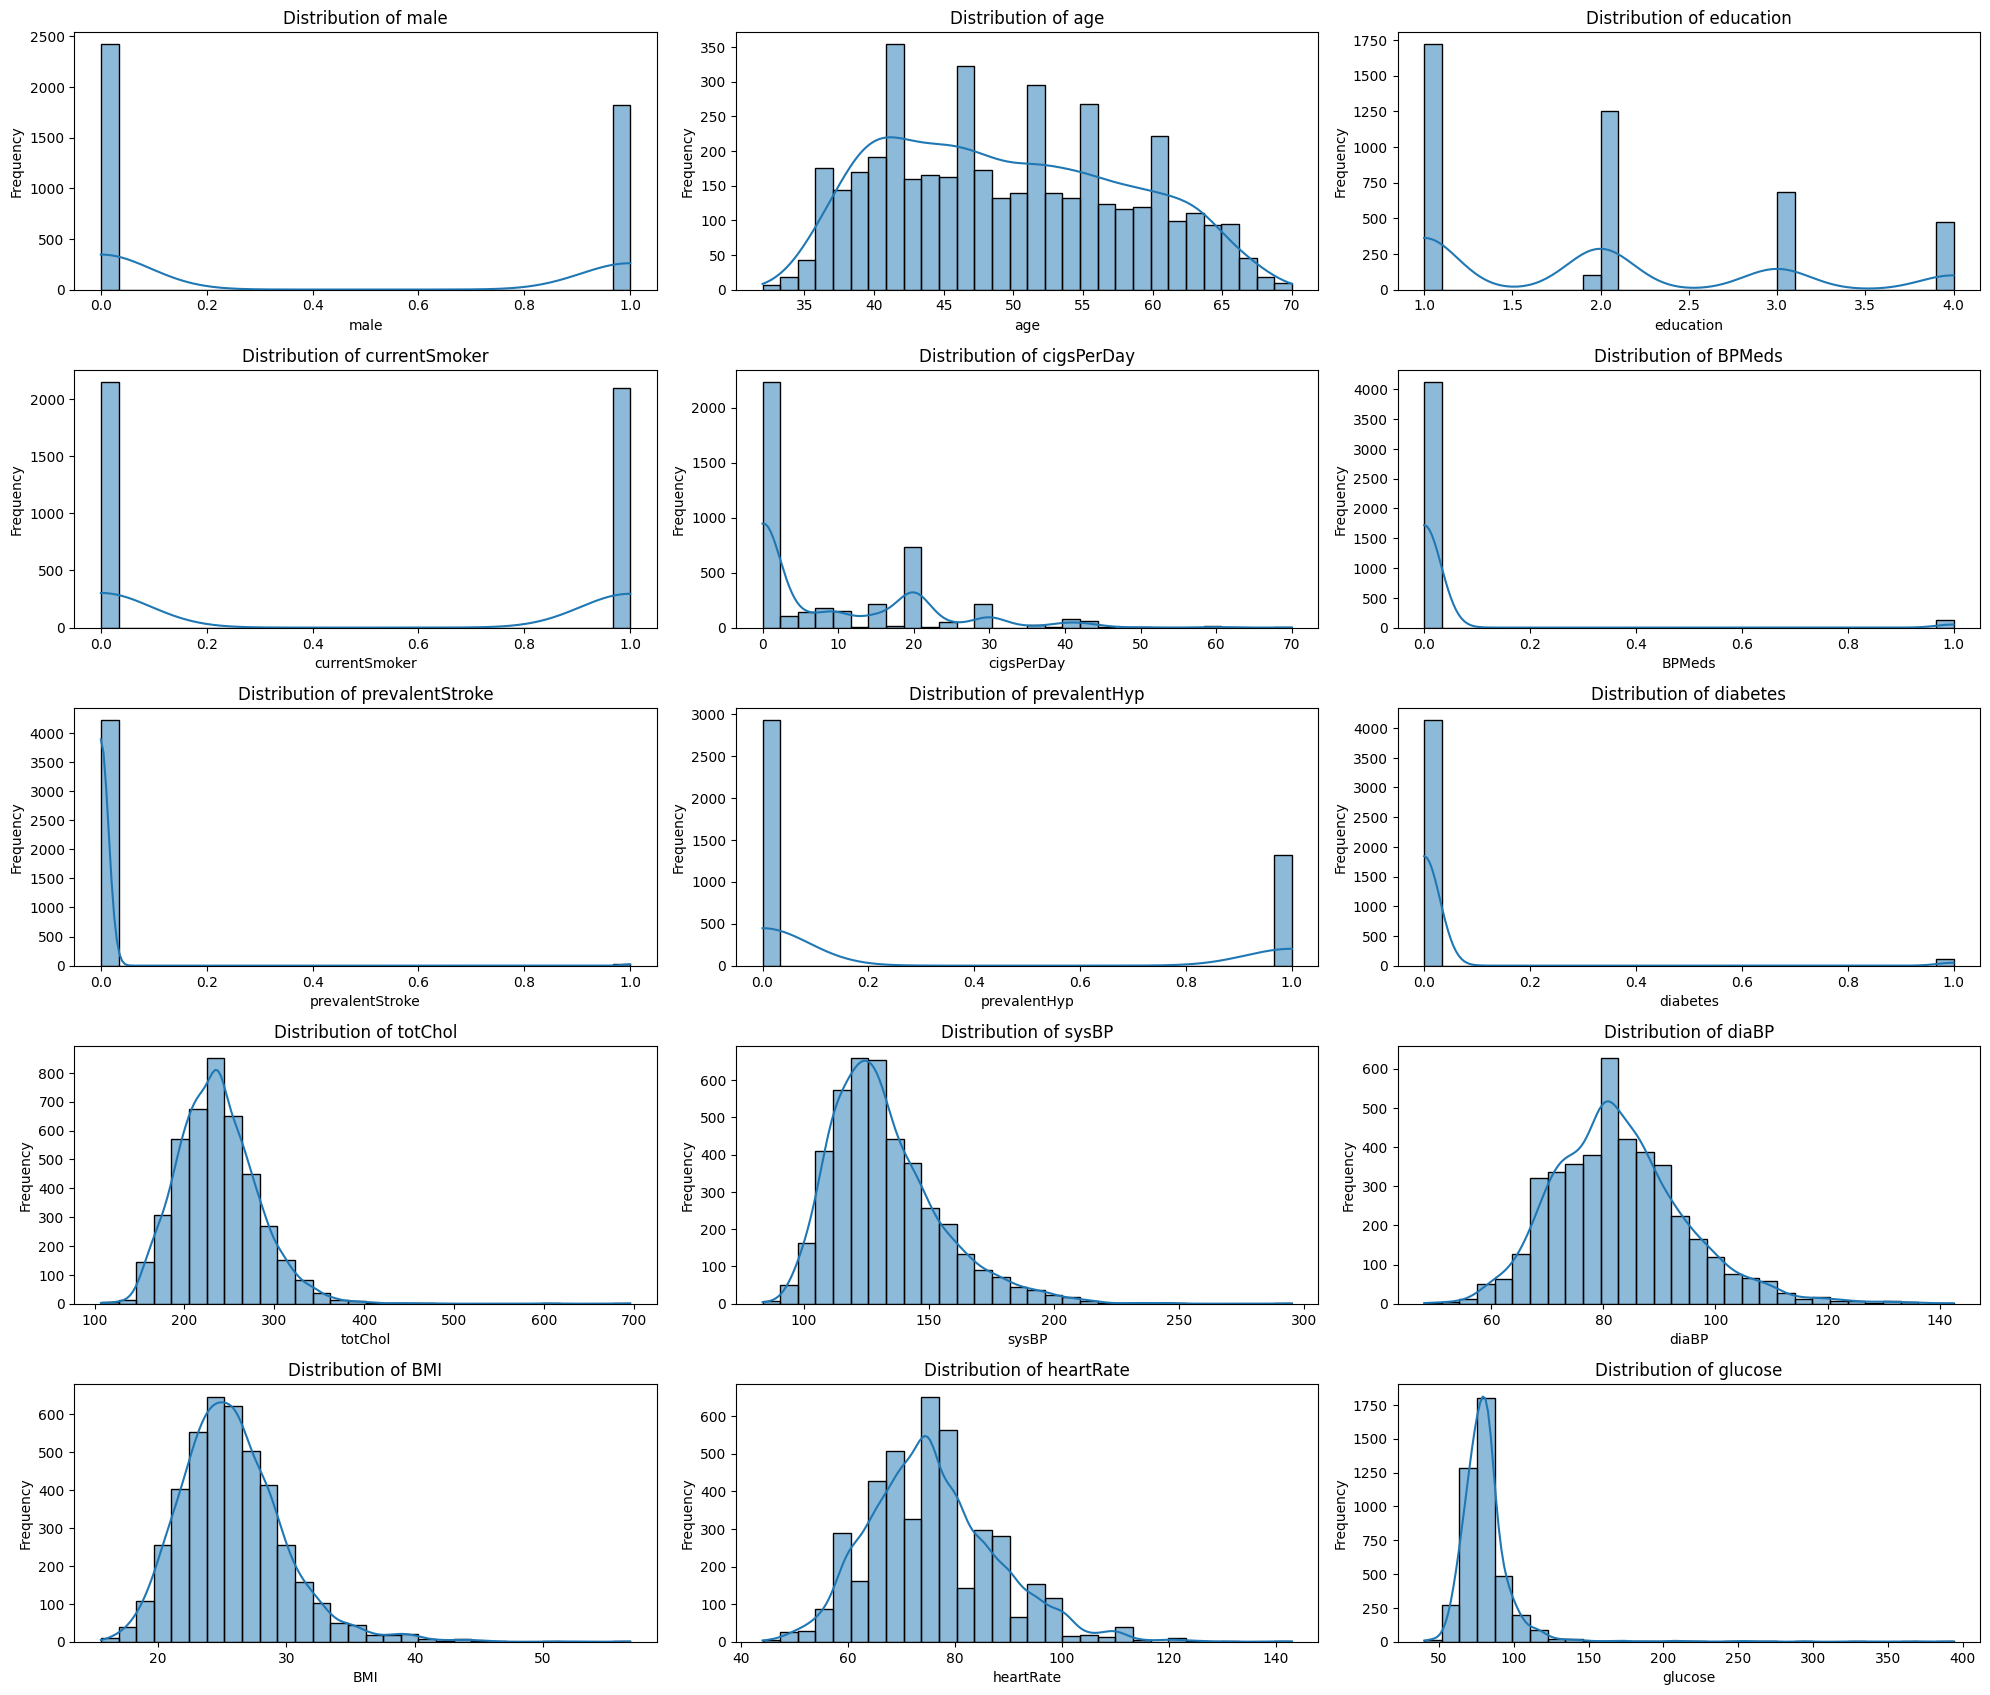

In [2]:
features = df.columns[:-1]

# Plot feature distributions
plt.figure(figsize=(20, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

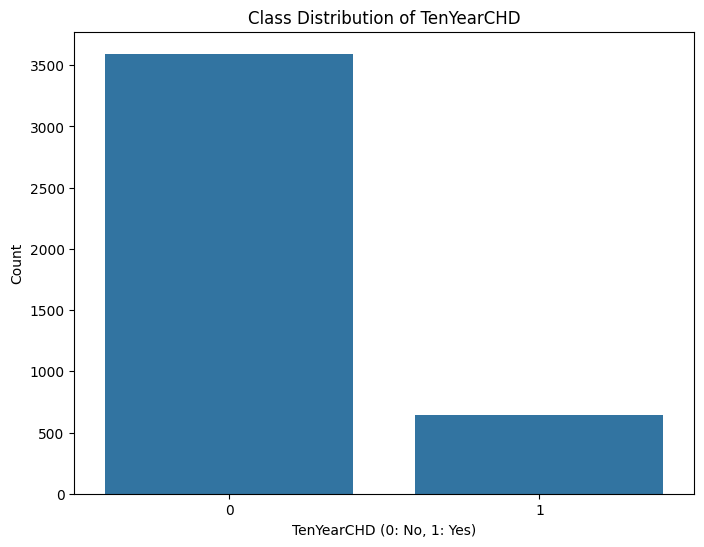

In [3]:
# Plot class distribution of the last column (TenYearCHD)
plt.figure(figsize=(8, 6))

# Using seaborn's countplot to visualize the distribution
sns.countplot(data=df, x='TenYearCHD')

# Adding title and labels
plt.title('Class Distribution of TenYearCHD')
plt.xlabel('TenYearCHD (0: No, 1: Yes)')
plt.ylabel('Count')

# Show the plot
plt.show()

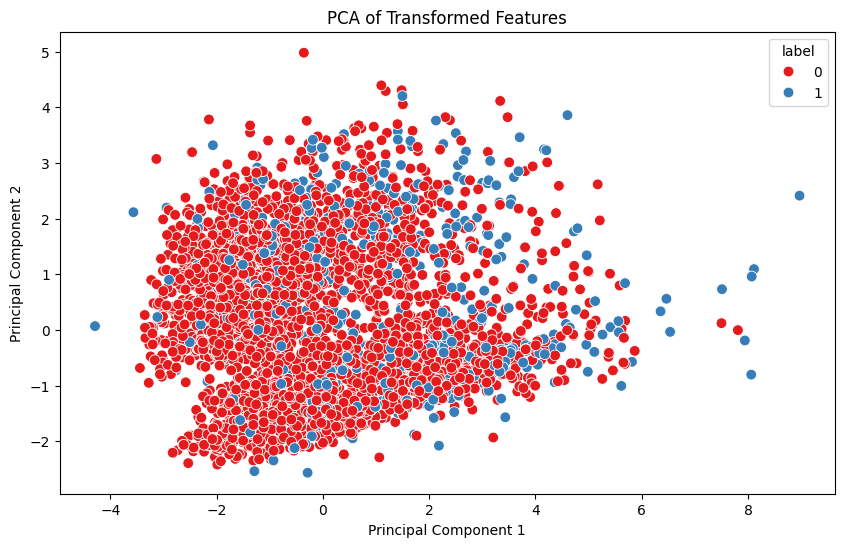

Explained Variance Ratio: [0.21303599 0.12536707]
Total Variance Explained by First Two Components: 0.33840305740638843


In [4]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

scaler_X = StandardScaler()

X_scaled = scaler_X.fit_transform(X)

# Apply PCA using sklearn to extract explained variance
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_transformed = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA components
df_pca = pd.DataFrame(X_transformed, columns=['PC1', 'PC2'])

# Add the target labels to the DataFrame
df_pca['label'] = y.values

# Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_pca, palette='Set1', s=60)

plt.title('PCA of Transformed Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained by First Two Components: {explained_variance.sum()}")

Explained Variance Ratio: [0.21365928 0.12528428]
Total Variance Explained by First Two Components: 0.33894356044578855


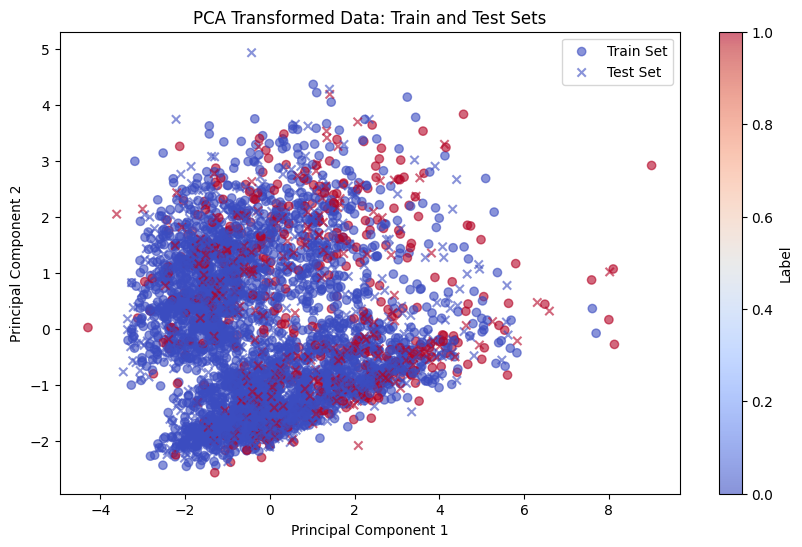

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

# Print explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained by First Two Components: {explained_variance.sum()}")

# Function to plot PCA transformed data
def plot_pca(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))

    # Plot the training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, label='Train', marker='o')

    # Plot the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6, label='Test', marker='x')

    plt.title('PCA Transformed Data: Train and Test Sets')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(['Train Set', 'Test Set'])
    plt.colorbar(label='Label')

    plt.show()

# Plot the PCA-transformed data
plot_pca(X_train_transformed, y_train, X_test_transformed, y_test)

In [6]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Fit and predict using Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Fit and predict using Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

# Fit and predict using Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Function to print metrics and confusion matrix
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Print metrics for Logistic Regression
print(f"Logistic Regression Coefficients: {log_reg.coef_}")
print_metrics(y_test, y_pred_log_reg, "Logistic Regression")

# Print metrics for Perceptron
print(f"\nPerceptron Coefficients: {perceptron.coef_}")
print_metrics(y_test, y_pred_perceptron, "Perceptron")

# Print metrics for Naive Bayes
print_metrics(y_test, y_pred_naive_bayes, "Naive Bayes")

Logistic Regression Coefficients: [[ 0.10699941  0.0289286  -0.27807761 -0.08710807  0.02175652  0.05532403
   0.0214651   0.29080251  0.04446197 -0.0033346   0.01780607 -0.01977484
  -0.06195107 -0.02516697  0.00844407]]

Logistic Regression Results:
Accuracy: 0.8546
Precision: 0.6000
Recall: 0.0479
Confusion Matrix:
[[1078    6]
 [ 179    9]]

Perceptron Coefficients: [[  250.          1181.          -599.01064602  -133.
    414.90425279   122.77037037    41.           542.
     69.          -282.61938873   622.          -508.
  -1513.06159042  -902.84753363   342.42441558]]

Perceptron Results:
Accuracy: 0.8483
Precision: 0.4138
Recall: 0.0638
Confusion Matrix:
[[1067   17]
 [ 176   12]]

Naive Bayes Results:
Accuracy: 0.8310
Precision: 0.3761
Recall: 0.2181
Confusion Matrix:
[[1016   68]
 [ 147   41]]


E:\Python 3.12.6\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Fit and predict using Logistic Regression on transformed data
log_reg_transformed = LogisticRegression()
log_reg_transformed.fit(X_train_transformed, y_train)
y_pred_log_reg_transformed = log_reg_transformed.predict(X_test_transformed)

# Fit and predict using Perceptron on transformed data
perceptron_transformed = Perceptron()
perceptron_transformed.fit(X_train_transformed, y_train)
y_pred_perceptron_transformed = perceptron_transformed.predict(X_test_transformed)

# Fit and predict using Naive Bayes on transformed data
naive_bayes_transformed = GaussianNB()
naive_bayes_transformed.fit(X_train_transformed, y_train)
y_pred_naive_bayes_transformed = naive_bayes_transformed.predict(X_test_transformed)

# Print metrics for Logistic Regression on transformed data
print(f"\nLogistic Regression on Transformed Data Coefficients: {log_reg_transformed.coef_}")
print_metrics(y_test, y_pred_log_reg_transformed, "Logistic Regression (Transformed Data)")

# Print metrics for Perceptron on transformed data
print(f"\nPerceptron on Transformed Data Coefficients: {perceptron_transformed.coef_}")
print_metrics(y_test, y_pred_perceptron_transformed, "Perceptron (Transformed Data)")

# Print metrics for Naive Bayes on transformed data
print_metrics(y_test, y_pred_naive_bayes_transformed, "Naive Bayes (Transformed Data)")


Logistic Regression on Transformed Data Coefficients: [[0.30111019 0.2173519 ]]

Logistic Regression (Transformed Data) Results:
Accuracy: 0.8538
Precision: 0.6667
Recall: 0.0213
Confusion Matrix:
[[1082    2]
 [ 184    4]]

Perceptron on Transformed Data Coefficients: [[-1.12386014  0.17650826]]

Perceptron (Transformed Data) Results:
Accuracy: 0.8176
Precision: 0.0417
Recall: 0.0106
Confusion Matrix:
[[1038   46]
 [ 186    2]]

Naive Bayes (Transformed Data) Results:
Accuracy: 0.8428
Precision: 0.3421
Recall: 0.0691
Confusion Matrix:
[[1059   25]
 [ 175   13]]


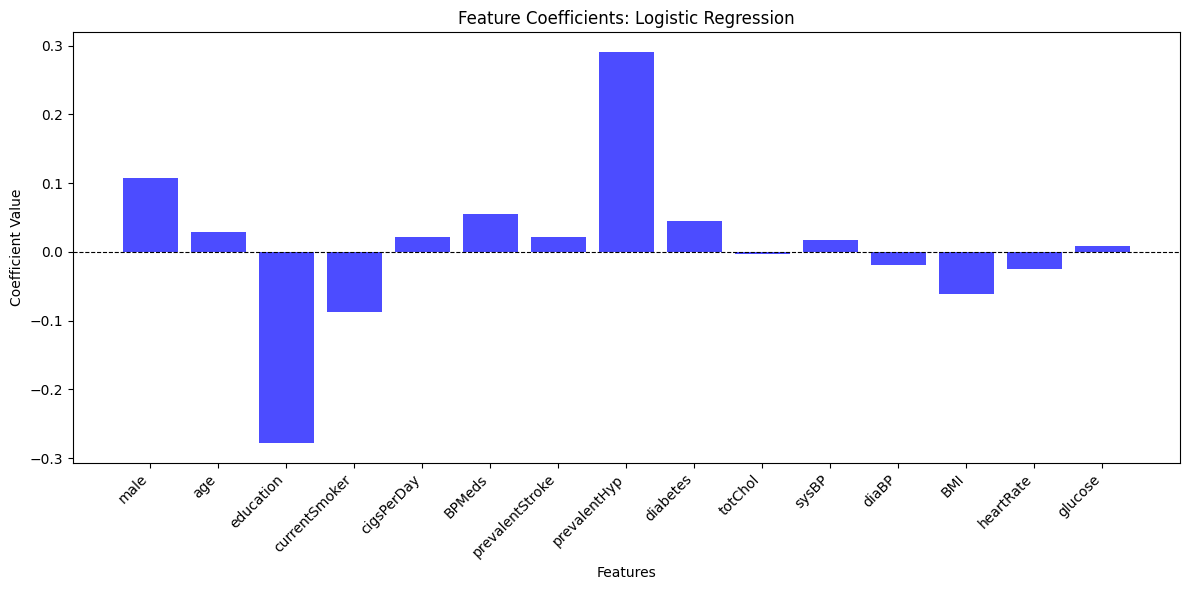

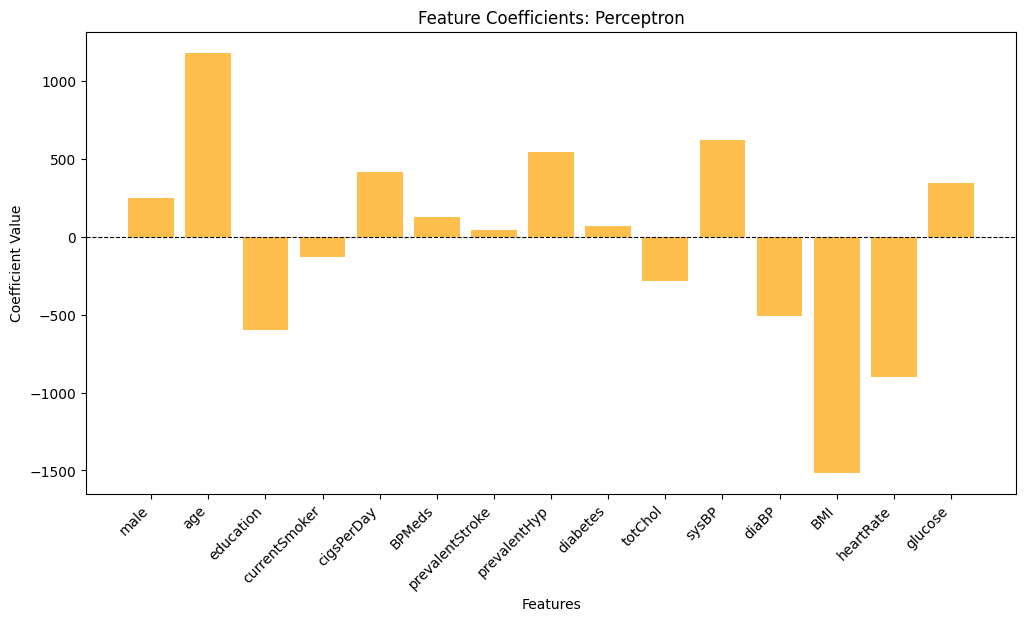

In [8]:
# Extract coefficients from Logistic Regression and Perceptron
log_reg_coefficients = log_reg.coef_[0]  # Logistic Regression coefficients
perceptron_coefficients = perceptron.coef_[0]  # Perceptron coefficients

# Create a DataFrame for the coefficients
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Logistic Regression Coefficients': log_reg_coefficients,
    'Perceptron Coefficients': perceptron_coefficients
})

# Set the Feature column as the index
coefficients_df.set_index('Feature', inplace=True)

# Plot coefficients for Logistic Regression
plt.figure(figsize=(12, 6))
plt.bar(coefficients_df.index, coefficients_df['Logistic Regression Coefficients'], color='blue', alpha=0.7)
plt.title('Feature Coefficients: Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0 for reference
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot coefficients for Perceptron
plt.figure(figsize=(12, 6))
plt.bar(coefficients_df.index, coefficients_df['Perceptron Coefficients'], color='orange', alpha=0.7)
plt.title('Feature Coefficients: Perceptron')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0 for reference

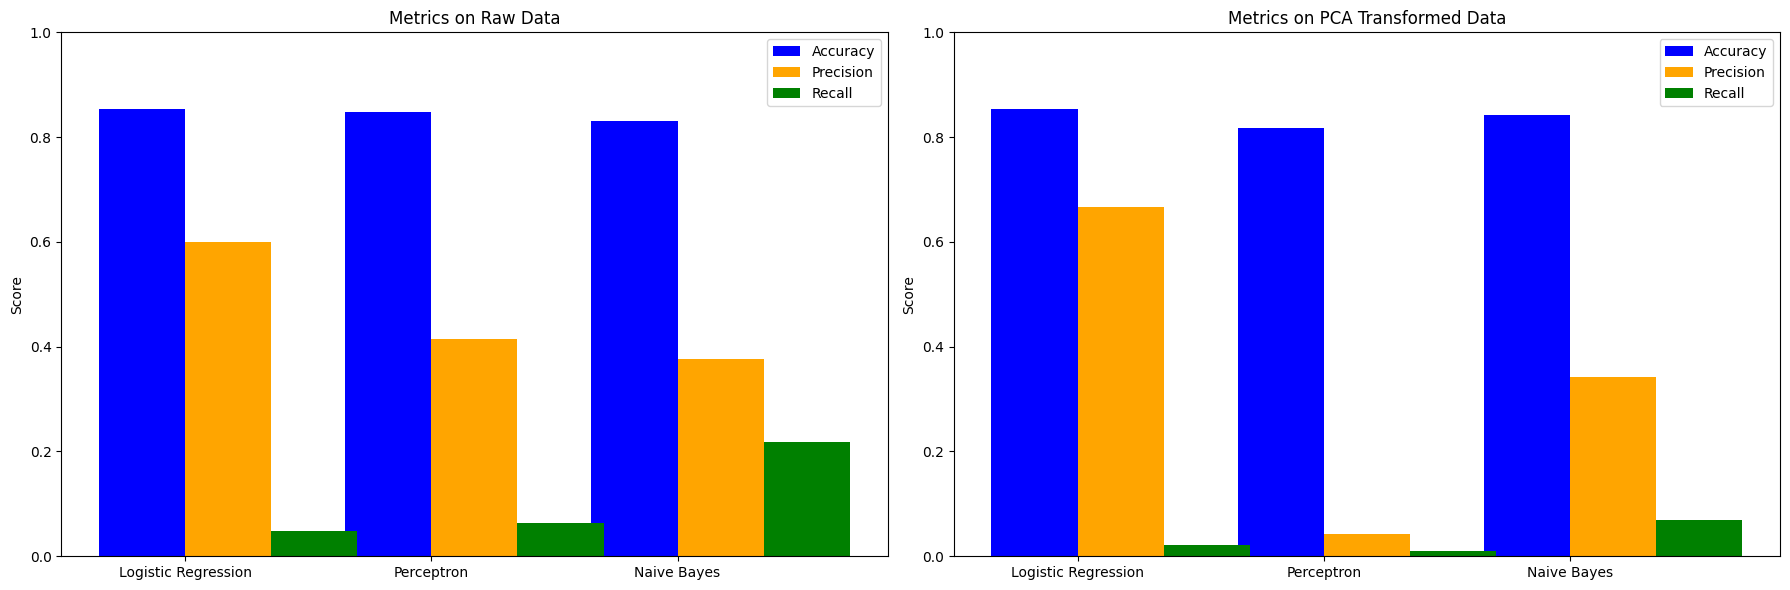

In [9]:
# Define the models and their respective names
models = ['Logistic Regression', 'Perceptron', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall']

# Collect metrics for raw data
metrics_raw = [
    [accuracy_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_log_reg)],
    [accuracy_score(y_test, y_pred_perceptron), precision_score(y_test, y_pred_perceptron), recall_score(y_test, y_pred_perceptron)],
    [accuracy_score(y_test, y_pred_naive_bayes), precision_score(y_test, y_pred_naive_bayes), recall_score(y_test, y_pred_naive_bayes)]
]

# Collect metrics for PCA transformed data
metrics_transformed = [
    [accuracy_score(y_test, y_pred_log_reg_transformed), precision_score(y_test, y_pred_log_reg_transformed), recall_score(y_test, y_pred_log_reg_transformed)],
    [accuracy_score(y_test, y_pred_perceptron_transformed), precision_score(y_test, y_pred_perceptron_transformed), recall_score(y_test, y_pred_perceptron_transformed)],
    [accuracy_score(y_test, y_pred_naive_bayes_transformed), precision_score(y_test, y_pred_naive_bayes_transformed), recall_score(y_test, y_pred_naive_bayes_transformed)]
]

# Convert to NumPy arrays for easier plotting
metrics_raw = np.array(metrics_raw)
metrics_transformed = np.array(metrics_transformed)

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot raw data metrics
axes[0].bar(x - width/2, metrics_raw[:, 0], width, label='Accuracy', color='blue')
axes[0].bar(x + width/2, metrics_raw[:, 1], width, label='Precision', color='orange')
axes[0].bar(x + 3*width/2, metrics_raw[:, 2], width, label='Recall', color='green')
axes[0].set_title('Metrics on Raw Data')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)
axes[0].legend()

# Plot transformed data metrics
axes[1].bar(x - width/2, metrics_transformed[:, 0], width, label='Accuracy', color='blue')
axes[1].bar(x + width/2, metrics_transformed[:, 1], width, label='Precision', color='orange')
axes[1].bar(x + 3*width/2, metrics_transformed[:, 2], width, label='Recall', color='green')
axes[1].set_title('Metrics on PCA Transformed Data')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_ylabel('Score')
axes[1].set_ylim(0, 1)
axes[1].legend()

# Customize layout
plt.tight_layout()
plt.show()

In [10]:
# The plot of feature coefficients indicates the importance and sensitivity
# of each feature in the model's classification task. Features with higher absolute
# coefficient values are considered more influential in determining the model's
# predictions. However, interpreting these results accurately necessitates domain
# knowledge to understand the context and implications of each feature in relation
# to the classification problem at hand.

# In terms of model performance, accuracy and recall values remained relatively
# consistent across different fitting approaches, suggesting that the overall ability
# of the models to correctly classify instances was stable. However, the precision
# of the Perceptron model exhibited significant variability when transitioning
# from the raw data to the scaled and transformed datasets. This fluctuation in precision
# may be attributed to the Perceptron's sensitivity to feature scaling, as it relies
# heavily on the distribution of the input data. When features are scaled and transformed,
# the relationships among them can shift, potentially leading to a more refined decision
# boundary, but also causing the model to misclassify certain instances, thereby affecting precision.